In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

sns.set_style("white")

In [3]:
crime_feats = pd.read_csv('crime_features.csv')
crime_feats.head()

,city,population,Pop Squared,Robbery,Murder,Propertycrime
0,Adams Village,1861.000,3463321.000,0,0,12.000
1,Addison Town and Village,2577.000,6640929.000,0,0,24.000
2,Akron Village,2846.000,8099716.000,0,0,16.000
3,Albany,97956.000,9595377936.000,1,1,4090.000
4,Albion Village,6388.000,40806544.000,1,0,223.000


In [5]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_feats['Propertycrime'].values.reshape(-1, 1)
X = crime_feats[['population','Pop Squared','Robbery', 'Murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.29510871e-02 1.14920528e-07 9.28205845e+01 1.95038666e+02]]

Intercept: 
 [-16.81586632]

R-squared:
0.8444937611173492


With population, poulation squared, robbery and murder this model explains 84.4% of variance in property crimes. From the coefficients it seems that property crime has the biggest per occurance increase when there are more murders.

## Check Assumptions

### Assumption One: Linear Relationship

Scatterplots

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


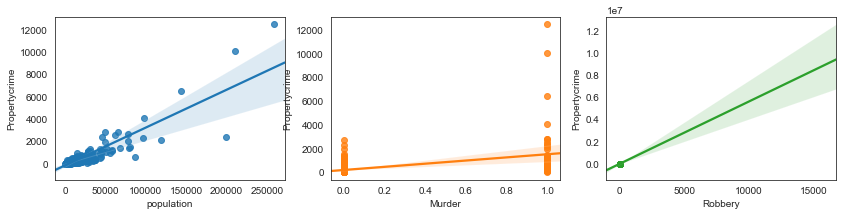

In [8]:
# Set variables
X_plot = ['population', 'Murder', 'Robbery']
Y_plot = 'Propertycrime'

# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])

plot_scat(crime_feats, X_plot, Y_plot)

### Assumption two: multivariate normality

### Assumption three: homoscedasticity

### Assumption four: low multicollinearity

Check for correlations

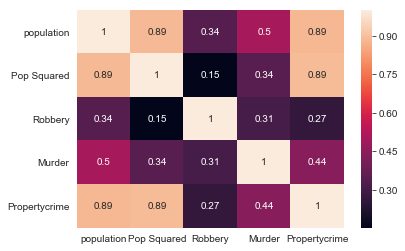

In [7]:
sns.heatmap(crime_feats.corr(), annot=True)
plt.show()

Population has the most correlation with property crime, and population squared seems redundant.